# Diabetes data and Regression

## Import and Prepare Data

In [ ]:
# import diabetes data
from sklearn.datasets import load_diabetes
dataset_diabetes = load_diabetes()

In [ ]:
# description of dataset
print(dataset_diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# feature names
f_names = dataset_diabetes.feature_names
f_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# input and output
X = dataset_diabetes.data
y = dataset_diabetes.target

In [ ]:
# data in a dataframe
import pandas as pd
df = pd.DataFrame(X, columns=f_names)
df['Target'] = y
df.head()

age       sex       bmi        bp  ...        s4        s5        s6  Target
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641   135.0

[5 rows x 11 columns]

## Data as a Dataframe

In [ ]:
import pandas as pd
# input values
df = pd.DataFrame(X, columns=f_names)

# output(target) values as a new column
df['Progression'] = y

df.head()

age       sex       bmi  ...        s5        s6  Progression
0  0.038076  0.050680  0.061696  ...  0.019908 -0.017646        151.0
1 -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204         75.0
2  0.085299  0.050680  0.044451  ...  0.002864 -0.025930        141.0
3 -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362        206.0
4  0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641        135.0

[5 rows x 11 columns]

# Exploratory Data Analysis (EDA)

## Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
# number of missing values
df.isna().sum().sum()

0

In [ ]:
print("Diabetes dataset dimensions: {}".format(df.shape))

Diabetes dataset dimensions: (442, 11)


### Conclusion
* There are 11 columns in this dataset (10 features and 1 target)
* This dataset contains 442 rows(patients)
* All data types are float
* There are no missing values in the dataset
* Sex is the only categorical feature

## Categorical/Ordinal Features

In [ ]:
# count values sex
df.value_counts('sex')

sex
-0.044642    235
 0.050680    207
dtype: int64

## Pie Chart

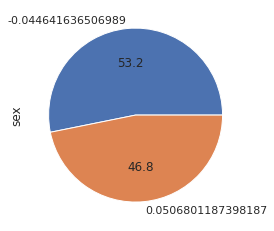

In [ ]:
# sex pie chart
df.sex.value_counts().plot.pie(autopct='%.1f');

## Conclusion:
* There is a small difference between the ratio of two genders (male and female). 
* One of the gender is 53.2 while the other is 46.8

## Descriptive Statistics

In [ ]:
df.describe().round(2)

age     sex     bmi      bp  ...      s4      s5      s6  Progression
count  442.00  442.00  442.00  442.00  ...  442.00  442.00  442.00       442.00
mean    -0.00    0.00   -0.00    0.00  ...    0.00   -0.00   -0.00       152.13
std      0.05    0.05    0.05    0.05  ...    0.05    0.05    0.05        77.09
min     -0.11   -0.04   -0.09   -0.11  ...   -0.08   -0.13   -0.14        25.00
25%     -0.04   -0.04   -0.03   -0.04  ...   -0.04   -0.03   -0.03        87.00
50%      0.01   -0.04   -0.01   -0.01  ...   -0.00   -0.00   -0.00       140.50
75%      0.04    0.05    0.03    0.04  ...    0.03    0.03    0.03       211.50
max      0.11    0.05    0.17    0.13  ...    0.19    0.13    0.14       346.00

[8 rows x 11 columns]

### Conclusion
* There are some outliers in the data, for example in s2, s3, and s4 etc.
* First 10 are independent features and last one is dependent
* There is huge difference between 75 percentile and max, that meabs there are many outliners there
* 25 percentile and min also has a large value gap. This also verifies outliners there
* There is huge difference between 75 percentile and max in s2, so that means there are some outliners present there, likewise in s4 and bmi
*

## Histogram

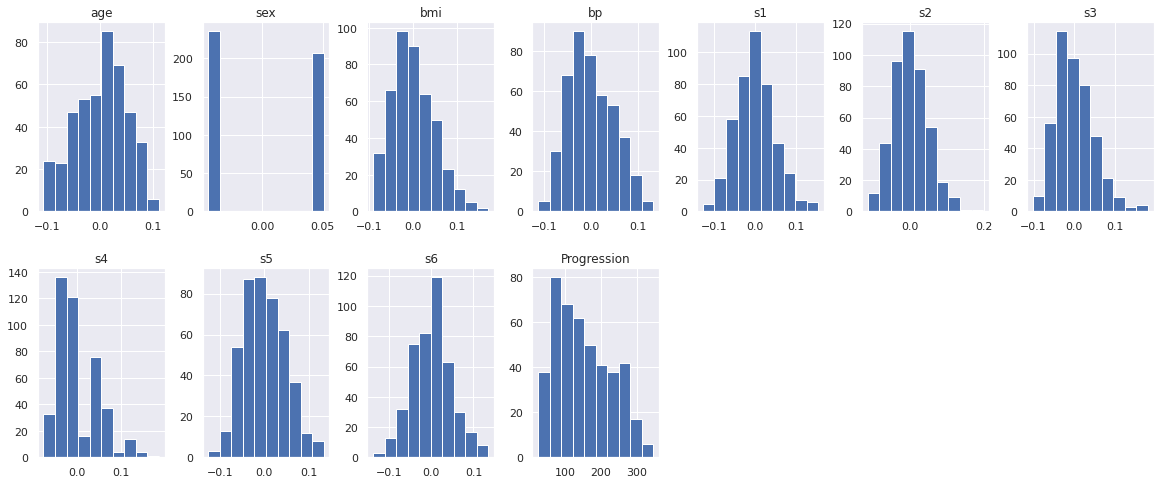

In [ ]:
df.hist(figsize=(20,8), layout=(2,7));

 ### Conclusion
* There are no categorical variables other than sex(Gender)
* There is no left skewed variables
* Attributes have different scale
Right skewed aratibutes are bmi, s3, s4
* s1, s5 and s6 seems like symmetric

## Boxplot

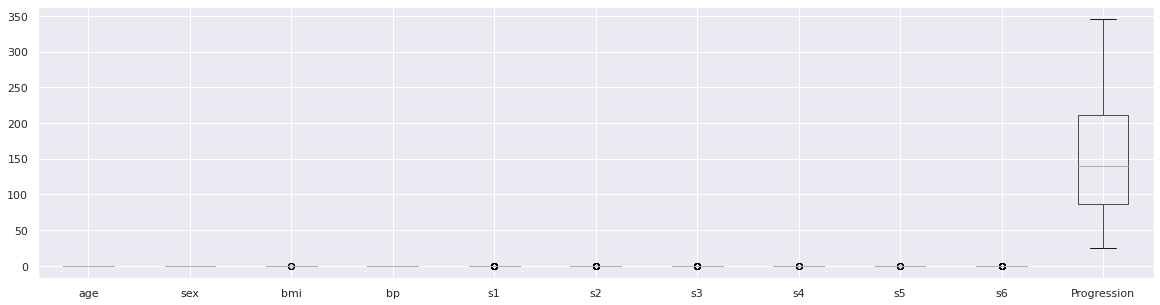

In [ ]:
df.boxplot(figsize=(20,5));

#Conclusions:
* It is hard to vizualize the outliners and data distribution in this figure, so it would be nice to plot individual figures to take a closer look on these features

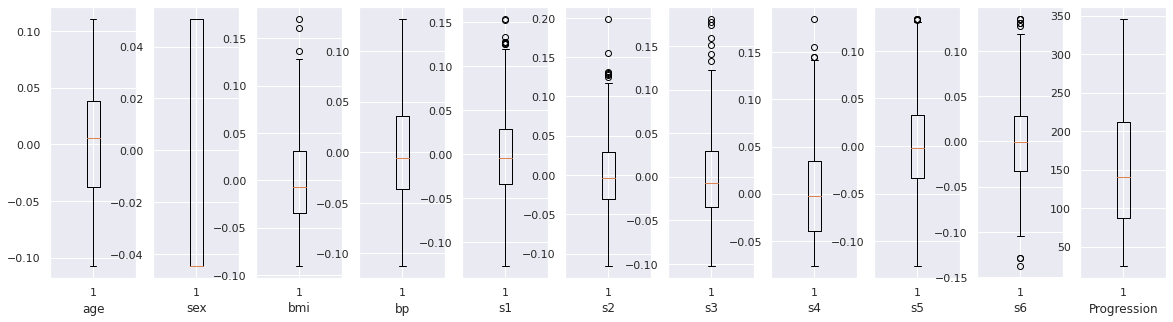

In [ ]:
# subplot matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in range(len(df.columns)):
  plt.subplot(1,len(df.columns),i+1)
  plt.boxplot(df.iloc[:,i])
  plt.xlabel(df.columns[i])

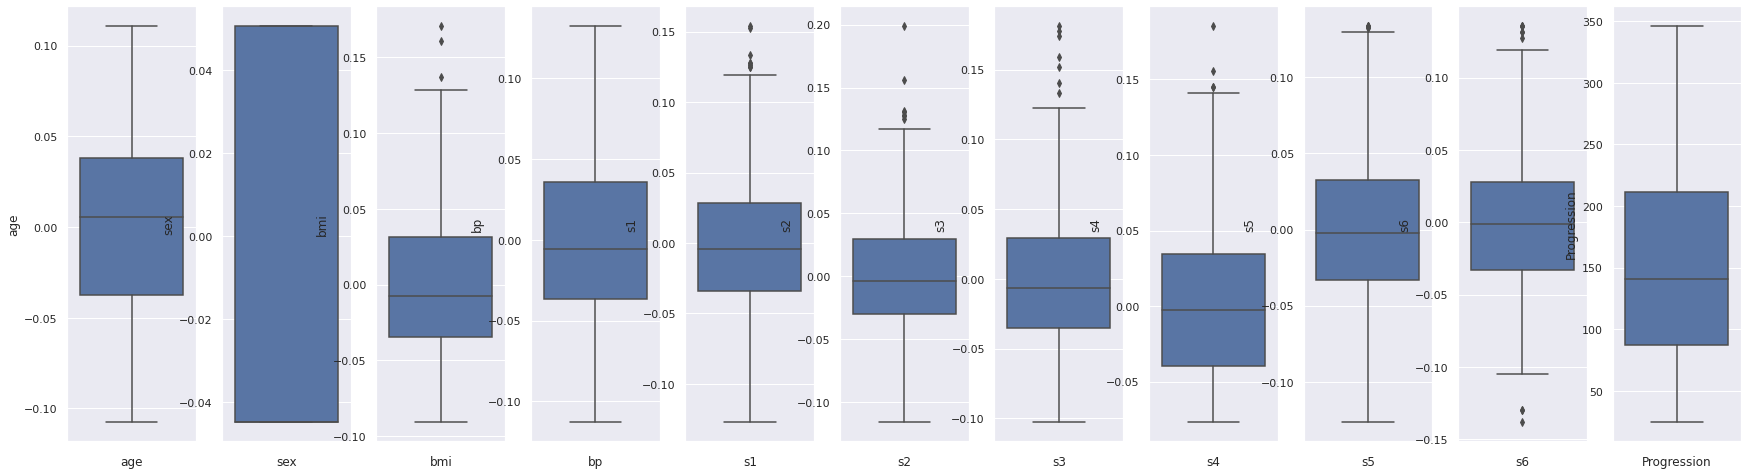

In [ ]:
# subplot sns
import seaborn as sns
plt.figure(figsize=(30,8))
for i in range(len(df.columns)):
  plt.subplot(1,len(df.columns),i+1)
  sns.boxplot(y=df.iloc[:,i])
  plt.xlabel(df.columns[i]);

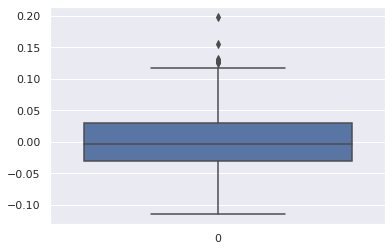

In [ ]:
import seaborn as sns
sns.set_theme()
sns.boxplot(data=df['s2']);

#Conclusion
* The data has several outliers including bmi, s1, s2, s3 and s6
* s6 has the smallest outlier.
* age, bp and sex does not have outliners
* In bmi, s3 and s4 lower wiskers are smaller than upper, that shows that all of the three are positively skewed means right skewed
* sex data is more dispersed than others



## Correlation

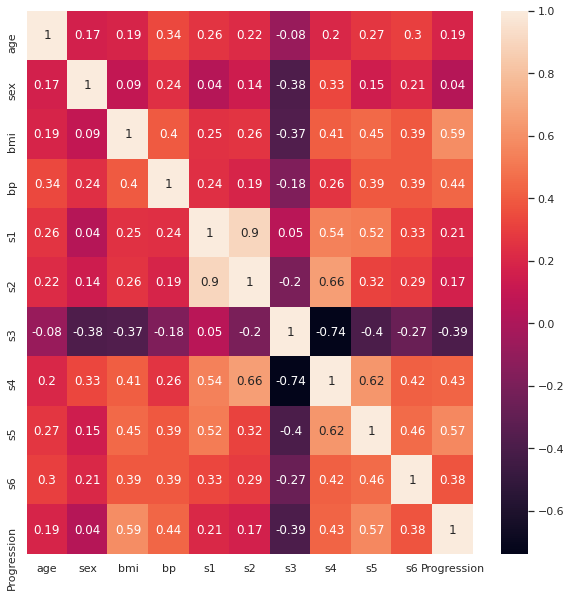

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2), annot=True);

# Conclusion:
* Darker the colour, strongest the negative correlation
* Lighter the colour, strongest the postive correlation
* There is a strong positive coorelation between s1 and S2 
* There is a strong negative coorelation between s3 and s4
* S3 is the only one that have negative correlation with Progression
* That means if s3 increase, Progression will decrease and likewise in opposite situation
*s5 and bmi have moderate postive correlation with Progression


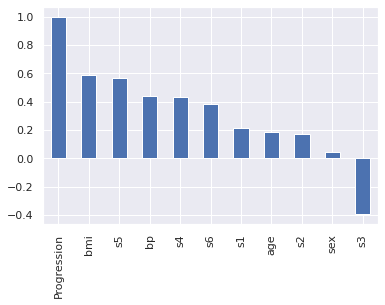

In [ ]:
# pd.plot
df.corr()['Progression'].sort_values(ascending=False).plot(kind='bar');

### Conclusion
* Moderate positive correlation  
  Progression and s5  
Progression and bmi

* Strong negative correlation   
   Progression and s3. 
* If s3 increase-Progression decrease, s3 decrease-Progression increase

In [ ]:
df.groupby('Progression').agg(['mean', 'median']).head(10)

age                 sex  ...        s5        s6          
                 mean    median      mean  ...    median      mean    median
Progression                                ...                              
25.0        -0.016412 -0.016412 -0.044642  ... -0.021394 -0.034215 -0.034215
31.0         0.001751  0.001751 -0.044642  ... -0.064683 -0.054925 -0.054925
37.0        -0.027310 -0.027310 -0.044642  ... -0.056158 -0.067351 -0.067351
39.0         0.003567  0.003567  0.003019  ... -0.066598  0.005135  0.005135
40.0        -0.001882 -0.001882 -0.044642  ... -0.046879  0.023775  0.023775
42.0        -0.027310 -0.020045  0.018906  ... -0.034524  0.030678  0.027917
43.0        -0.085430 -0.085430  0.050680  ... -0.096433 -0.034215 -0.034215
44.0         0.009016  0.009016  0.050680  ... -0.039810 -0.013504 -0.013504
45.0        -0.052738 -0.052738  0.050680  ... -0.086829  0.003064  0.003064
47.0         0.019913  0.019913  0.050680  ... -0.070209 -0.030072 -0.030072

[10 rows x 20 columns]

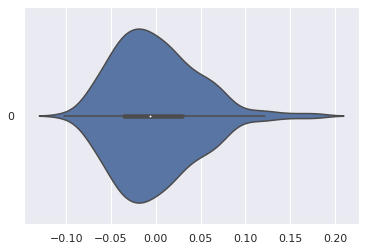

In [ ]:
sns.violinplot(data=df['s3'],orient='horizontal');

#Conclusions:
* With above figure we can say that the most of the data is apparoximatly clustered around the median. Its little towards the left to the median though
* Most of the data is in negative side

## Scatter Matrix and Pairplot

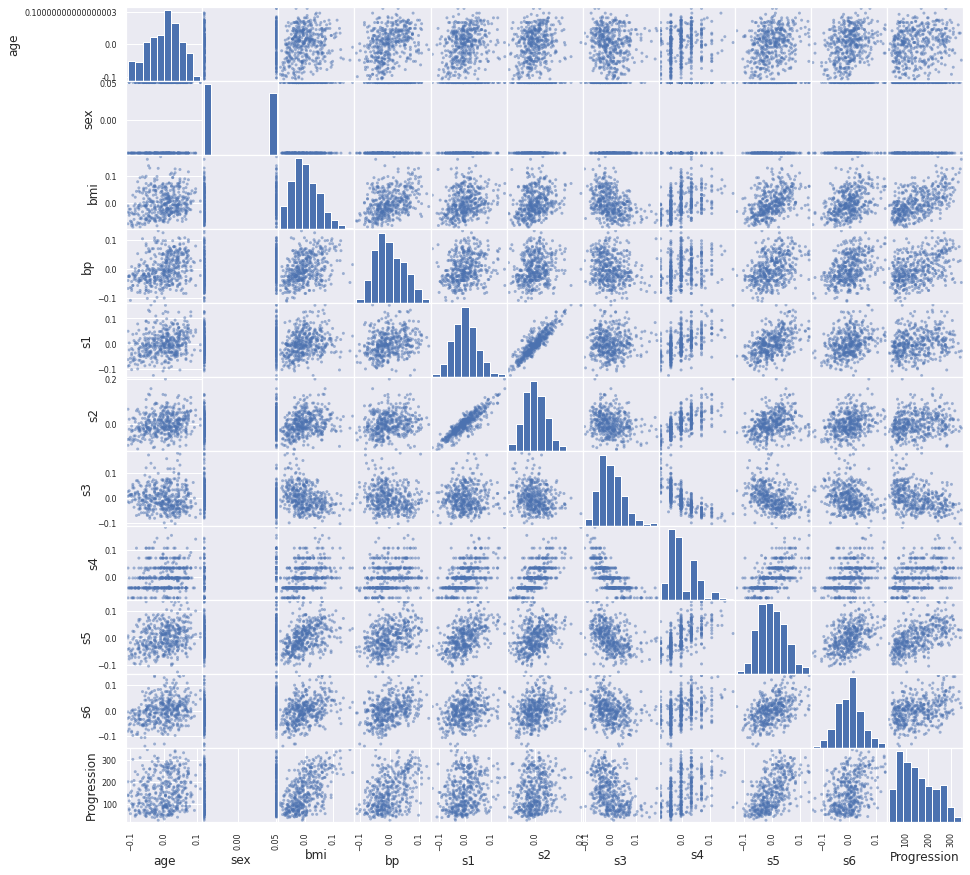

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

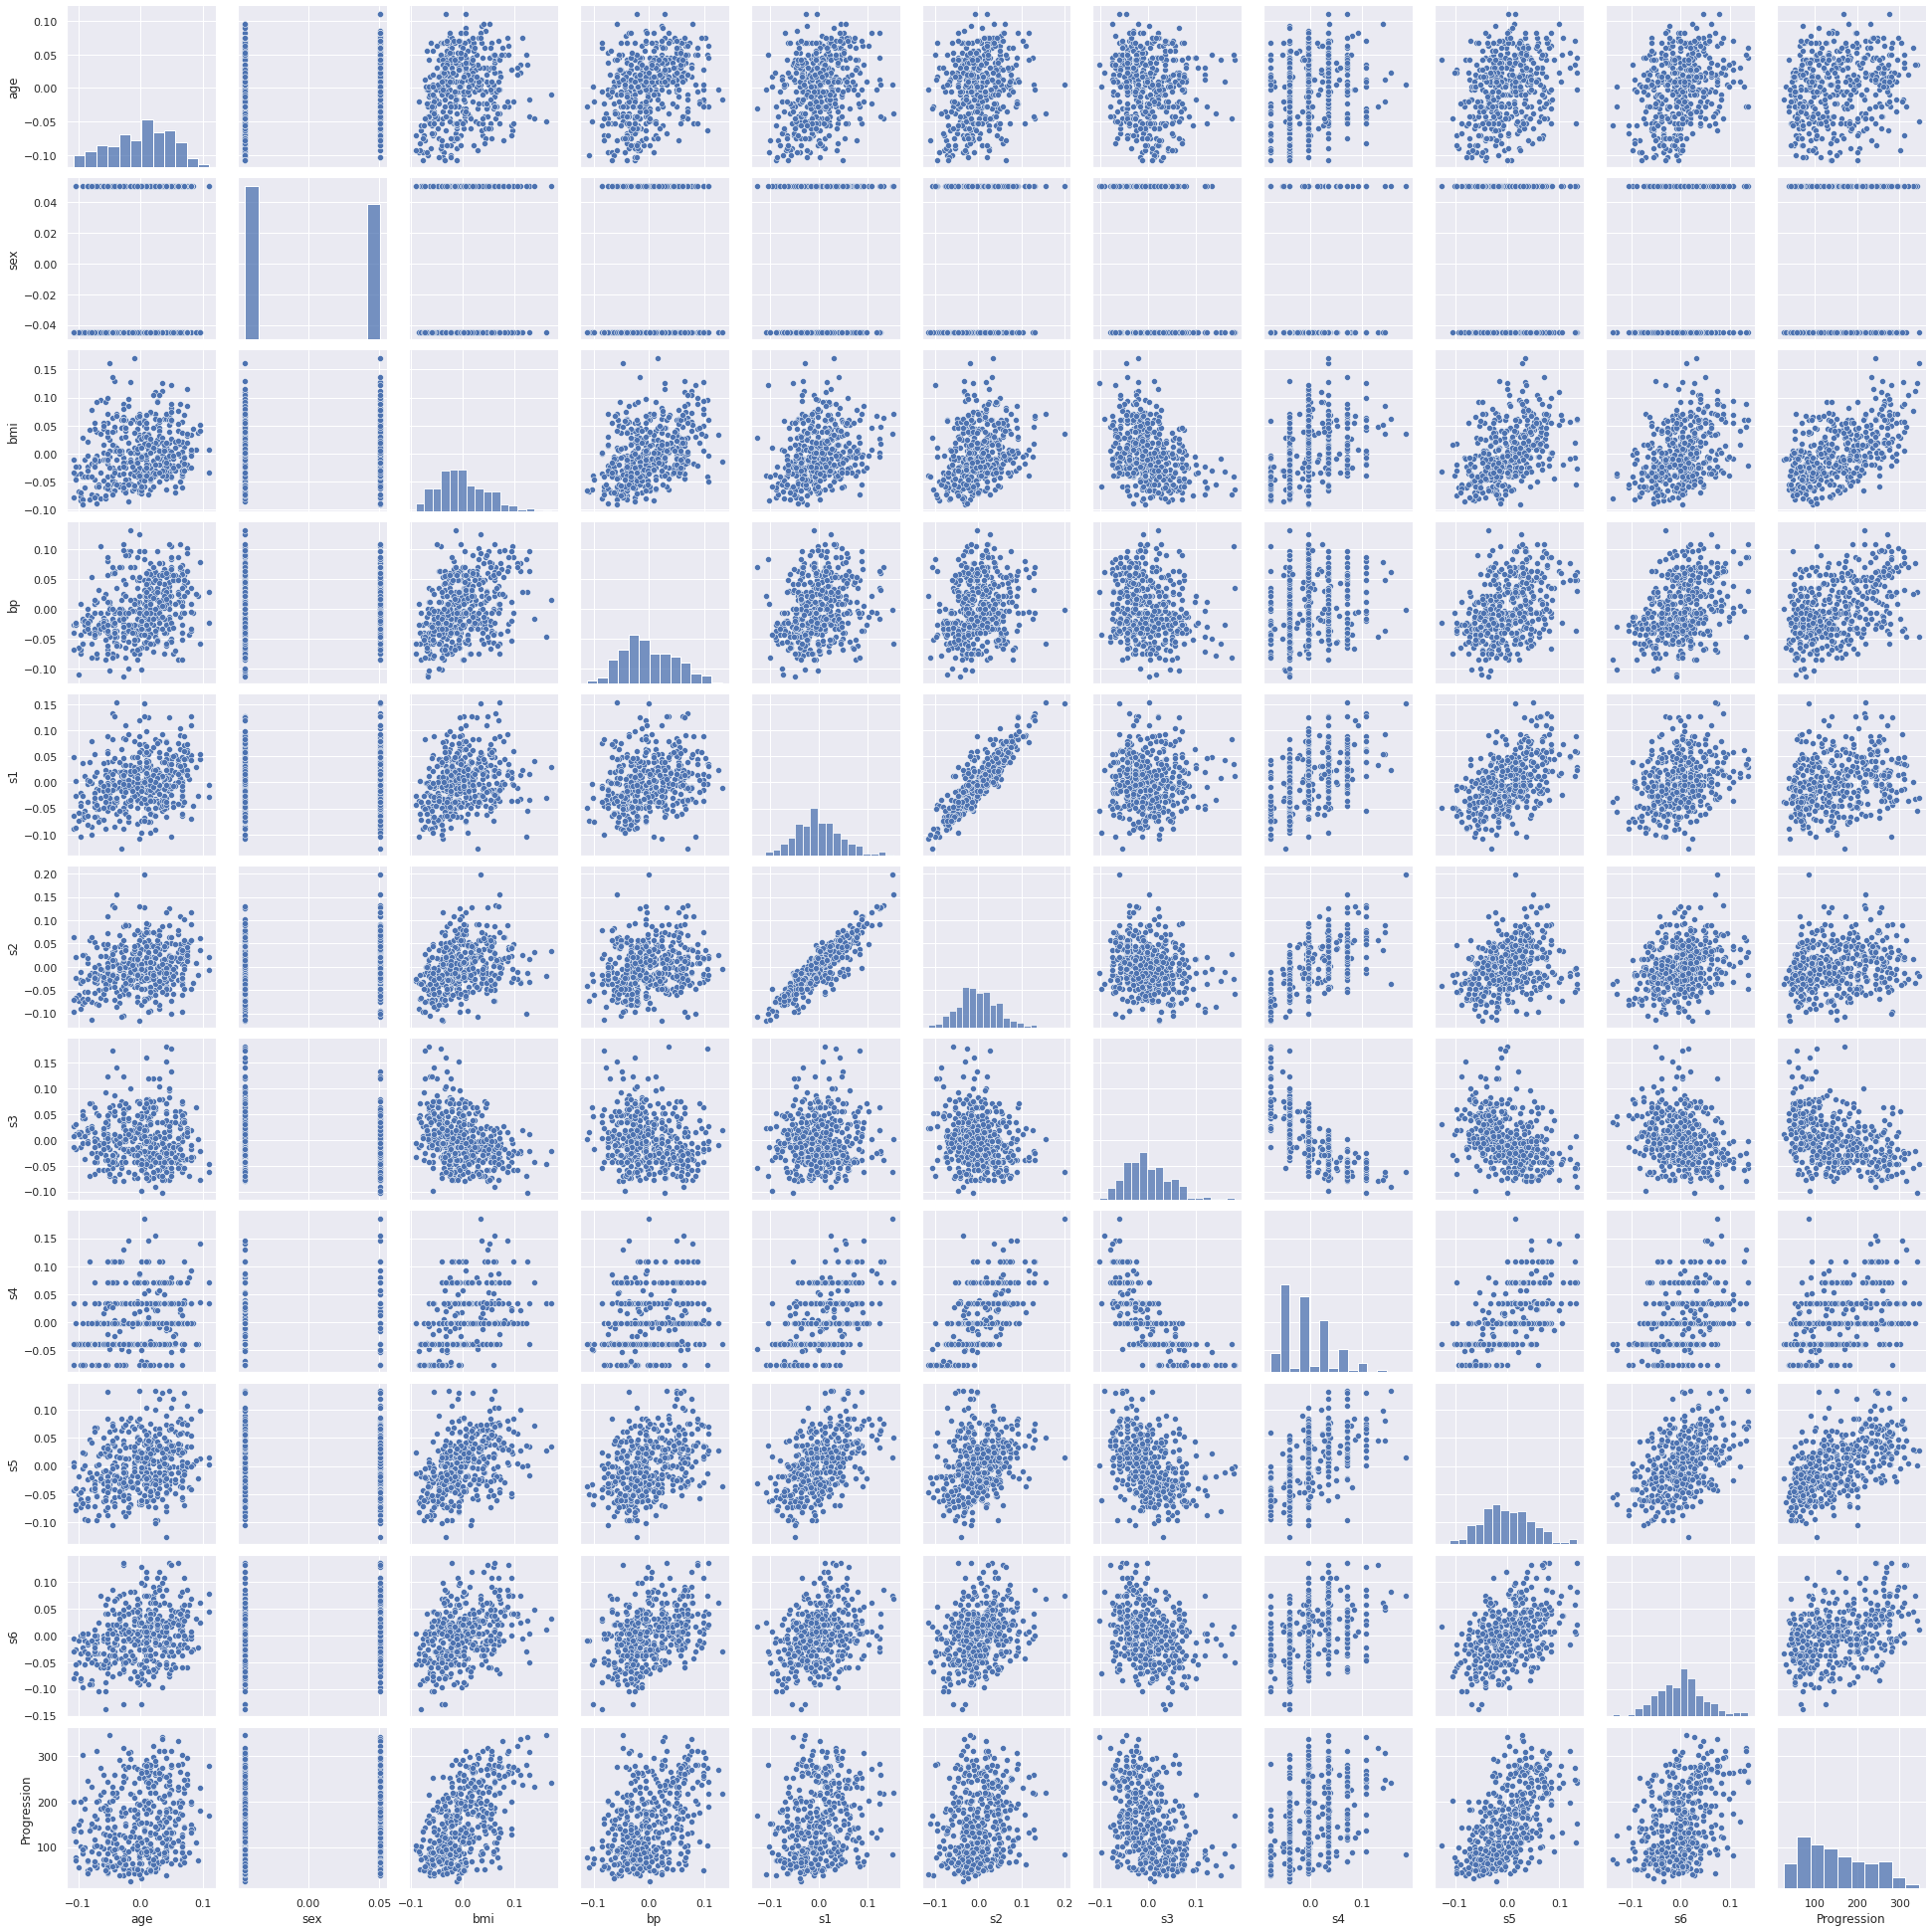

In [ ]:
sns.pairplot(df);

### Conclusion
- To most promissing attributes to predict the progression are s3, s5 and bmi 
* Scatter and pair plot also shows the postive correlation between s2 and s1
* negative corelation between s3 and s4

## Scatter Plot

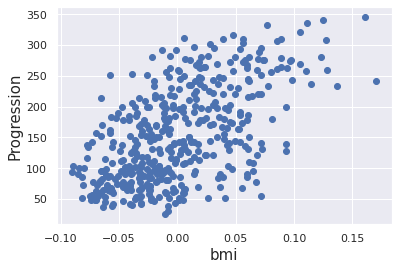

In [ ]:
plt.ylabel('Progression',fontsize=15)
plt.xlabel('bmi',fontsize=15)
plt.scatter(df['bmi'],df['Progression'])

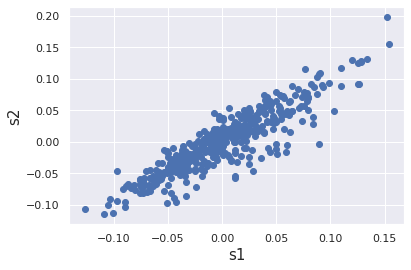

In [ ]:
plt.ylabel('s2',fontsize=15)
plt.xlabel('s1',fontsize=15)
plt.scatter(df['s1'],df['s2'])

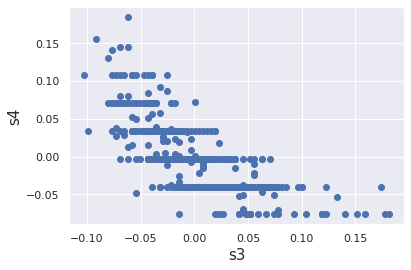

In [ ]:
plt.ylabel('s4',fontsize=15)
plt.xlabel('s3',fontsize=15)
plt.scatter(df['s3'],df['s4'])

 ### Conclusion
- MEDV increases as s2 increases so does s3 
- MEDV decreases as LSTAT increases 
- There is a horizontal linear 

# Supervised Learning

### Training Test Split


In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.shape, y_test.shape

((331, 10), (111,))

## Result Dataframe

In [ ]:
df_result = pd.DataFrame(columns=[['Scaling','Model','Parameter','Training Score','Test Score']])
df_result

Empty DataFrame
Columns: [(Scaling,), (Model,), (Parameter,), (Training Score,), (Test Score,)]
Index: []

#Conclusions:
* Here we created an empty dataframe
* The scaling part is always true in this, because data has been already scaled
* This means we don't have to scale the data

## kNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','kNN','n_neighbors=1',knn.score(X_train,y_train),knn.score(X_test,y_test)]
df_result

Scaling Model      Parameter Training Score Test Score
0    True   kNN  n_neighbors=1            1.0  -0.075355

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train,y_train),knn.score(X_test,y_test)
df_result.loc[len(df_result)]  = ['True','kNN','n_neighbors=3',knn.score(X_train,y_train),knn.score(X_test,y_test)]
df_result

Scaling Model      Parameter Training Score Test Score
0    True   kNN  n_neighbors=1         1.0000  -0.075355
1    True   kNN  n_neighbors=3         0.6293   0.372222

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_train,y_train),knn.score(X_test,y_test)
df_result.loc[len(df_result)]  = ['True','kNN','n_neighbors=5',knn.score(X_train,y_train),knn.score(X_test,y_test)]
df_result

Scaling Model      Parameter Training Score Test Score
0    True   kNN  n_neighbors=1       1.000000  -0.075355
1    True   kNN  n_neighbors=3       0.629300   0.372222
2    True   kNN  n_neighbors=5       0.570761   0.446593

#Conclusions:
* When n_neighbors is 1 the test is a negative value and training value is 1.
* This shows overfitting of the training data and also the performance is very poor
* Then we increase the n_neighbors to 3 and then 5, the performance improved but not up to the marks
* We can say this model is not a good model to predict the progression


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Linear Regression','---',lin_reg.score(X_train,y_train),knn.score(X_test,y_test)]
df_result

Scaling              Model      Parameter Training Score Test Score
0    True                kNN  n_neighbors=1       1.000000  -0.075355
1    True                kNN  n_neighbors=3       0.629300   0.372222
2    True                kNN  n_neighbors=5       0.570761   0.446593
3    True  Linear Regression            ---       0.519035   0.446593

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(X, y)
cross_val_score(lin_reg, X, y, cv = 5)

array([0.42955643, 0.52259828, 0.4826784 , 0.42650827, 0.55024923])

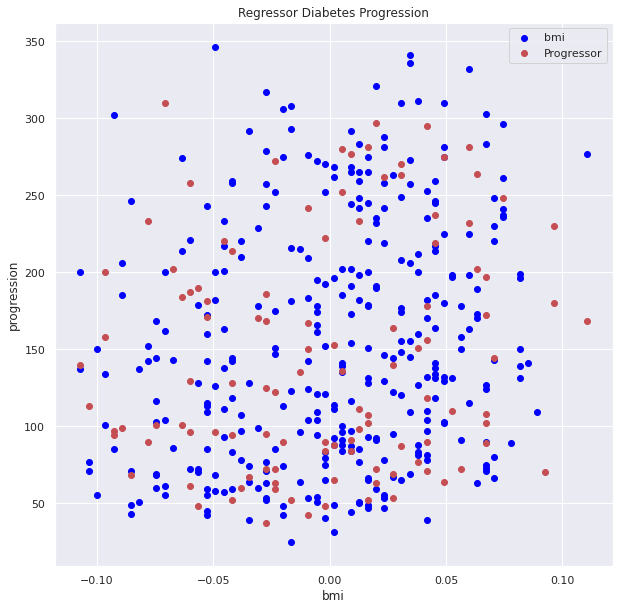

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0], y_train, label='bmi', c='blue')
plt.scatter(X_test[:,0], y_test, label='Progressor', c='r')
plt.xlabel('bmi')
plt.ylabel('progression')
plt.title('Regressor Diabetes Progression')
plt.legend();

#Conclusions:
* When n_neighbors is 1 the test score is negative 
* After increasing n_neighbors value the test result is not satisfactory, as it is below 0.50

## Desicion Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Desicion Tree','max_depth=1',dtr.score(X_train,y_train),dtr.score(X_test,y_test)]
df_result

Scaling              Model      Parameter Training Score Test Score
0    True                kNN  n_neighbors=1       1.000000  -0.075355
1    True                kNN  n_neighbors=3       0.629300   0.372222
2    True                kNN  n_neighbors=5       0.570761   0.446593
3    True  Linear Regression            ---       0.519035   0.446593
4    True      Desicion Tree    max_depth=1       0.290455   0.214909

In [ ]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Desicion Tree','max_depth=2',dtr.score(X_train,y_train),dtr.score(X_test,y_test)]
df_result

Scaling              Model      Parameter Training Score Test Score
0    True                kNN  n_neighbors=1       1.000000  -0.075355
1    True                kNN  n_neighbors=3       0.629300   0.372222
2    True                kNN  n_neighbors=5       0.570761   0.446593
3    True  Linear Regression            ---       0.519035   0.446593
4    True      Desicion Tree    max_depth=1       0.290455   0.214909
5    True      Desicion Tree    max_depth=2       0.438054   0.340034

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Desicion Tree','max_depth=3',dtr.score(X_train,y_train),dtr.score(X_test,y_test)]
df_result

Scaling              Model      Parameter Training Score Test Score
0    True                kNN  n_neighbors=1       1.000000  -0.075355
1    True                kNN  n_neighbors=3       0.629300   0.372222
2    True                kNN  n_neighbors=5       0.570761   0.446593
3    True  Linear Regression            ---       0.519035   0.446593
4    True      Desicion Tree    max_depth=1       0.290455   0.214909
5    True      Desicion Tree    max_depth=2       0.438054   0.340034
6    True      Desicion Tree    max_depth=3       0.509503   0.350324

In [ ]:
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Desicion Tree','max_depth=4',dtr.score(X_train,y_train),dtr.score(X_test,y_test)]
df_result

Scaling              Model      Parameter Training Score Test Score
0    True                kNN  n_neighbors=1       1.000000  -0.075355
1    True                kNN  n_neighbors=3       0.629300   0.372222
2    True                kNN  n_neighbors=5       0.570761   0.446593
3    True  Linear Regression            ---       0.519035   0.446593
4    True      Desicion Tree    max_depth=1       0.290455   0.214909
5    True      Desicion Tree    max_depth=2       0.438054   0.340034
6    True      Desicion Tree    max_depth=3       0.509503   0.350324
7    True      Desicion Tree    max_depth=4       0.582718   0.312973

#Conclusions:
* Decision Tree Regressor model perform even worse than the upper models
* Even after increasing the max_depth the test results did not go above 0.35


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=5)
rfr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Random Forest','n_estimators=5',rfr.score(X_train,y_train),rfr.score(X_test,y_test)]
df_result

Scaling          Model       Parameter Training Score Test Score
0    True            kNN   n_neighbors=1       1.000000  -0.075355
1    True  Random Forest  n_estimators=5       0.853015   0.269021

In [ ]:
rfr = RandomForestRegressor(n_estimators=7)
rfr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Random Forest','n_estimators=7',rfr.score(X_train,y_train),rfr.score(X_test,y_test)]
df_result

Scaling          Model       Parameter Training Score Test Score
0    True            kNN   n_neighbors=1       1.000000  -0.075355
1    True  Random Forest  n_estimators=5       0.853015   0.269021
2    True  Random Forest  n_estimators=7       0.879880   0.381278

In [ ]:
rfr = RandomForestRegressor(n_estimators=7, max_depth=2)
rfr.fit(X_train, y_train)
df_result.loc[len(df_result)] = ['True','Random Forest','n_estimators=7,  max_depth=2',rfr.score(X_train,y_train),
                                 rfr.score(X_test,y_test)]
df_result

Scaling          Model  ... Training Score Test Score
0    True            kNN  ...       1.000000  -0.075355
1    True  Random Forest  ...       0.853015   0.269021
2    True  Random Forest  ...       0.879880   0.381278
3    True  Random Forest  ...       0.485572   0.495627

[4 rows x 5 columns]

#Conclusions:
* In Random Forest Regressor model we increase the n_estimators upto 7 and we increase the max_depth too but like other models this model also performed very bad
* This model shows overfitting of the training data too, as training score is much higher than test score

# Unsupervised Learning

## kMeans

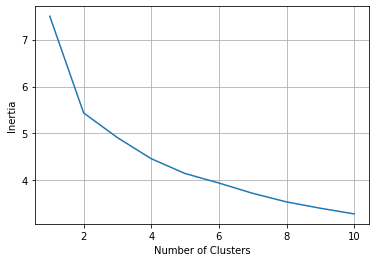

In [ ]:
from sklearn.cluster import KMeans
# inertia graph
l_inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_train)
    l_inertia.append(kmeans.inertia_)
plt.plot( range(1,11), l_inertia )
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid();

In [ ]:
    kmeans = KMeans(n_clusters = 3)
    kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Conclusions:
* k = 2 is the elbow of the graph, as this the point where decrease in inertis begins to slow
* k=2 is the optimal choice, because after that the change in the vakue of inertiais not significant
* 

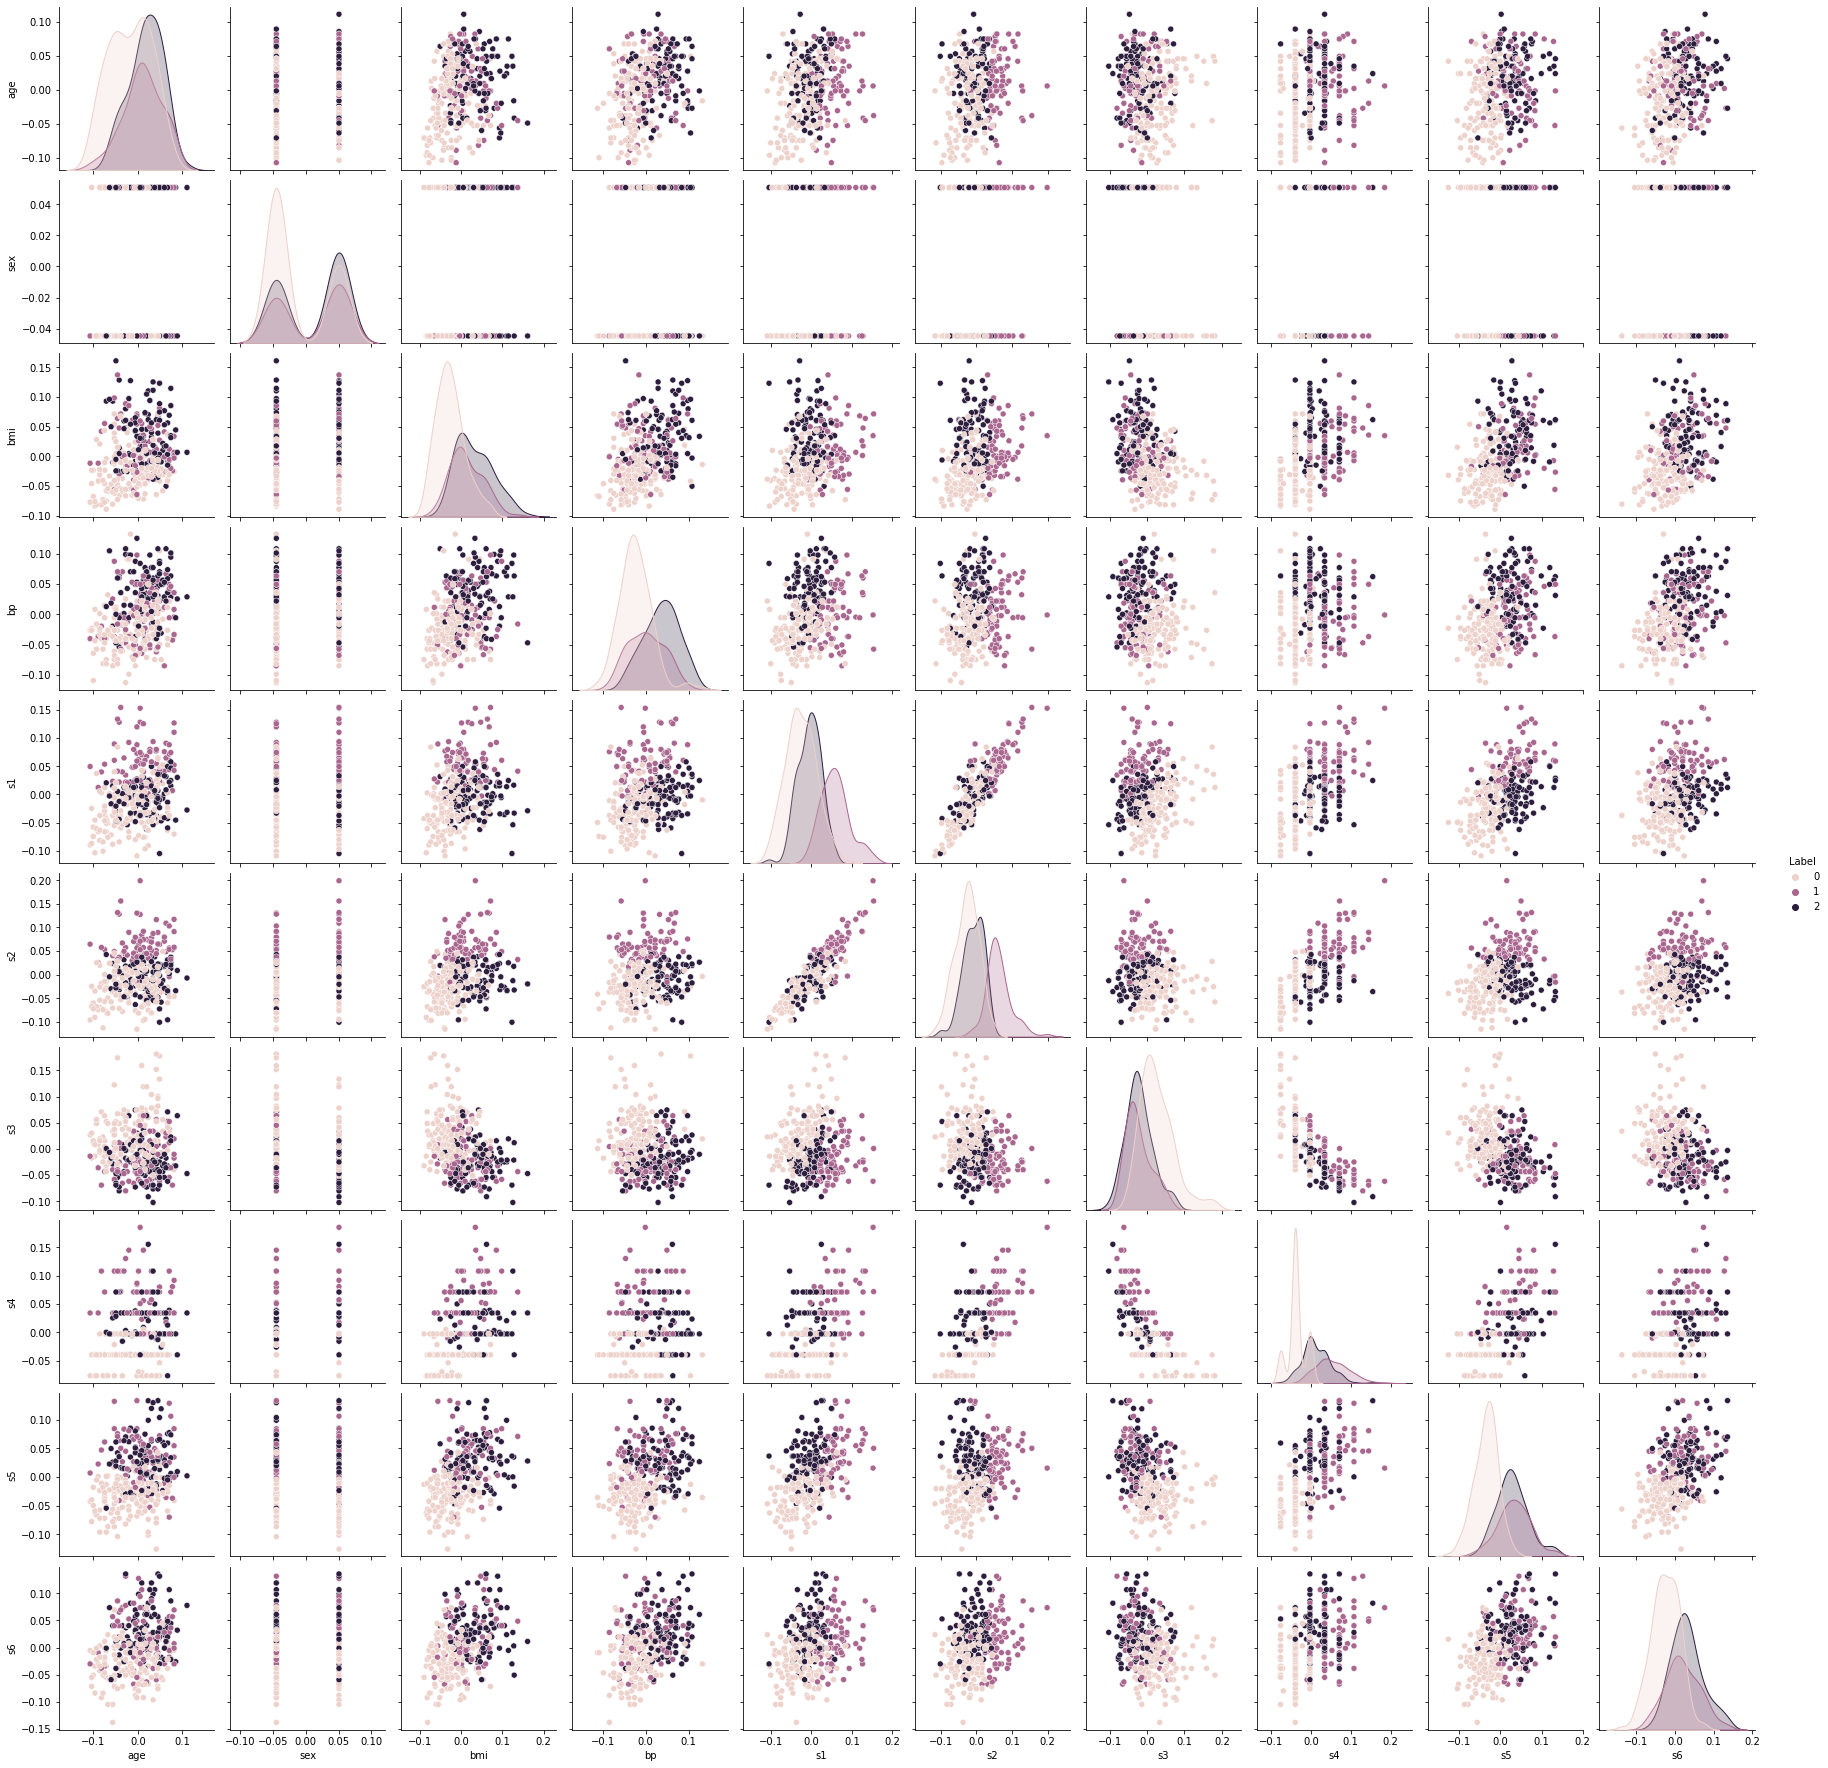

In [ ]:
df_train = pd.DataFrame(X_train, columns=f_names)
df_train['Label'] = kmeans.labels_
sns.pairplot(df_train, hue='Label');

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca_10 = PCA(n_components=10)
pca_10.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

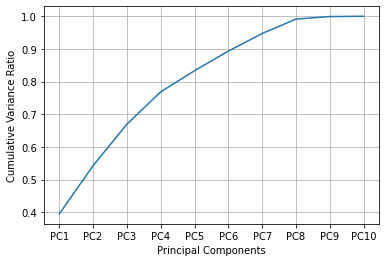

In [ ]:
# plot cumsum
import matplotlib.pyplot as plt
x_l = ['PC'+str(i) for i in range(1,11)   ]
plt.plot(x_l, pca_10.explained_variance_ratio_.cumsum())
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid()

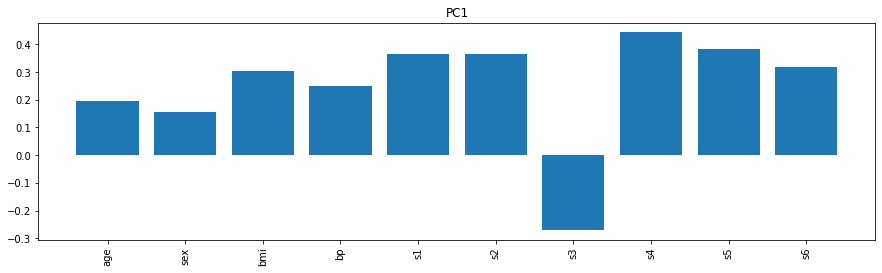

In [ ]:
# PC1
plt.figure(figsize=(15,4))
plt.bar(f_names, pca_10.components_[0,:])
plt.title('PC1')
plt.xticks(rotation=90);

### PCA in dim=2

In [ ]:
# 2 pc
pca_2 = PCA(n_components=2)
pca_2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# transform
X_train_pca_2 = pca_2.transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

X_train_pca_2.shape

(331, 2)

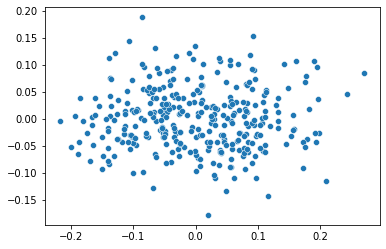

In [ ]:
# plot transformed data
sns.scatterplot( x = X_train_pca_2[:,0], y  = X_train_pca_2[:,1]   );

### PCA and kMEANS

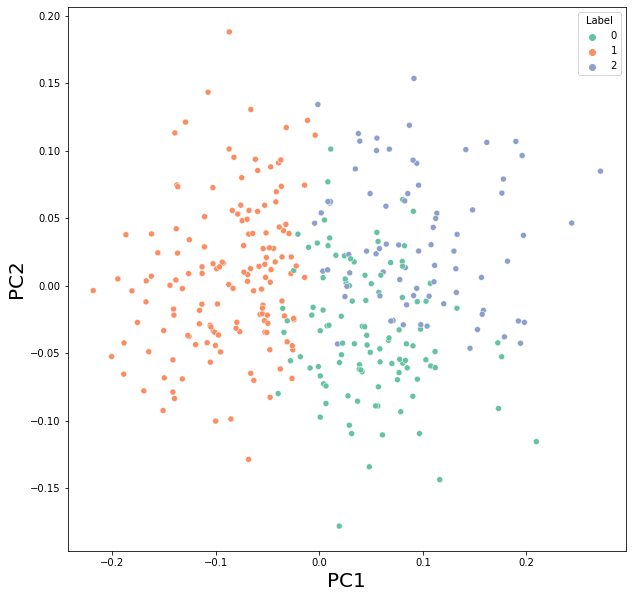

In [ ]:
# plot transformed data with hue
plt.figure(figsize=(10,10))
sns.scatterplot( x = X_train_pca_2[:,0], y  = X_train_pca_2[:,1], hue = df_train['Label'], palette ='Set2'   )
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20);

# Hybrid Models

## PCA and kNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_pca_2, y_train)
knn.score(X_train_pca_2,y_train),knn.score(X_test_pca_2,y_test)
df_result.loc[len(df_result)] = ['True','PCA2-kNN','n_neighbors=5',knn.score(X_train_pca_2,y_train),knn.score(X_test_pca_2,y_test)]
df_result

Scaling              Model  ... Training Score Test Score
0     True                kNN  ...       1.000000  -0.075355
1     True                kNN  ...       0.629300   0.372222
2     True                kNN  ...       0.570761   0.446593
3     True  Linear Regression  ...       0.519035   0.446593
4     True      Desicion Tree  ...       0.290455   0.214909
5     True      Desicion Tree  ...       0.438054   0.340034
6     True      Desicion Tree  ...       0.509503   0.350324
7     True      Desicion Tree  ...       0.582718   0.312973
8     True      Random Forest  ...       0.862230   0.352864
9     True      Random Forest  ...       0.864738   0.323737
10    True      Random Forest  ...       0.471560   0.430556
11    True           PCA2-kNN  ...       0.498523   0.188519

[12 rows x 5 columns]

In [ ]:
X_train_pca_10 = pca_10.transform(X_train)
X_test_pca_10 = pca_10.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_pca_10, y_train)
knn.score(X_train_pca_10,y_train),knn.score(X_test_pca_10,y_test)
df_result.loc[len(df_result)] = ['True','PCA10-kNN','n_neighbors=5',knn.score(X_train_pca_10,y_train),knn.score(X_test_pca_10,y_test)]
df_result

Scaling              Model  ... Training Score Test Score
0     True                kNN  ...       1.000000  -0.075355
1     True                kNN  ...       0.629300   0.372222
2     True                kNN  ...       0.570761   0.446593
3     True  Linear Regression  ...       0.519035   0.446593
4     True      Desicion Tree  ...       0.290455   0.214909
5     True      Desicion Tree  ...       0.438054   0.340034
6     True      Desicion Tree  ...       0.509503   0.350324
7     True      Desicion Tree  ...       0.582718   0.312973
8     True      Random Forest  ...       0.862230   0.352864
9     True      Random Forest  ...       0.864738   0.323737
10    True      Random Forest  ...       0.471560   0.430556
11    True           PCA2-kNN  ...       0.498523   0.188519
12    True          PCA10-kNN  ...       0.570761   0.446593

[13 rows x 5 columns]

# Cross Validation

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
cross_val_score(knn, X, y, cv = 5)

array([0.3079542 , 0.28333902, 0.3800721 , 0.2667414 , 0.30106848])

In [ ]:
#cross validation
lin_reg = LinearRegression()
lin_reg.fit(X, y)
cross_val_score(lin_reg, X, y, cv = 5)

array([0.42955643, 0.52259828, 0.4826784 , 0.42650827, 0.55024923])

In [ ]:
#cross validation
rfr = RandomForestRegressor(n_estimators=5)
rfr.fit(X, y)
cross_val_score(rfr, X, y, cv = 5)

array([0.27566992, 0.40495123, 0.32923259, 0.26086178, 0.41738165])

#Conclusions:
* CV is also not proved beneficial to get a good result on any of the three models
* In all the folds the score is below 0.50


# Grid Search

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters
param_grid = {'max_depth': [3,5,7],'n_estimators': [5,10,20,30]}

In [ ]:
grid_search = GridSearchCV(rfr, param_grid, cv=5)

In [ ]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=5, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [ ]:
# best scores
grid_search.best_score_

0.42902204905355273

In [ ]:
# training score
grid_search.score(X_train, y_train)

0.7280262282220473

In [ ]:
# test score
grid_search.score(X_test, y_test)

0.48224548921938737

In [ ]:
df_result.loc[len(df_result)] = ['True','GS_RF',grid_search.best_params_,grid_search.score(X_train, y_train),grid_search.score(X_test, y_test)]
df_result

Scaling              Model  ... Training Score Test Score
0     True                kNN  ...       1.000000  -0.075355
1     True                kNN  ...       0.629300   0.372222
2     True                kNN  ...       0.570761   0.446593
3     True  Linear Regression  ...       0.519035   0.446593
4     True      Desicion Tree  ...       0.290455   0.214909
5     True      Desicion Tree  ...       0.438054   0.340034
6     True      Desicion Tree  ...       0.509503   0.350324
7     True      Desicion Tree  ...       0.582718   0.312973
8     True      Random Forest  ...       0.862230   0.352864
9     True      Random Forest  ...       0.864738   0.323737
10    True      Random Forest  ...       0.471560   0.430556
11    True           PCA2-kNN  ...       0.498523   0.188519
12    True          PCA10-kNN  ...       0.570761   0.446593
13    True              GS_RF  ...       0.728026   0.482245

[14 rows x 5 columns]

#Conclusions:
* Even after Grid search test score is below 0.50